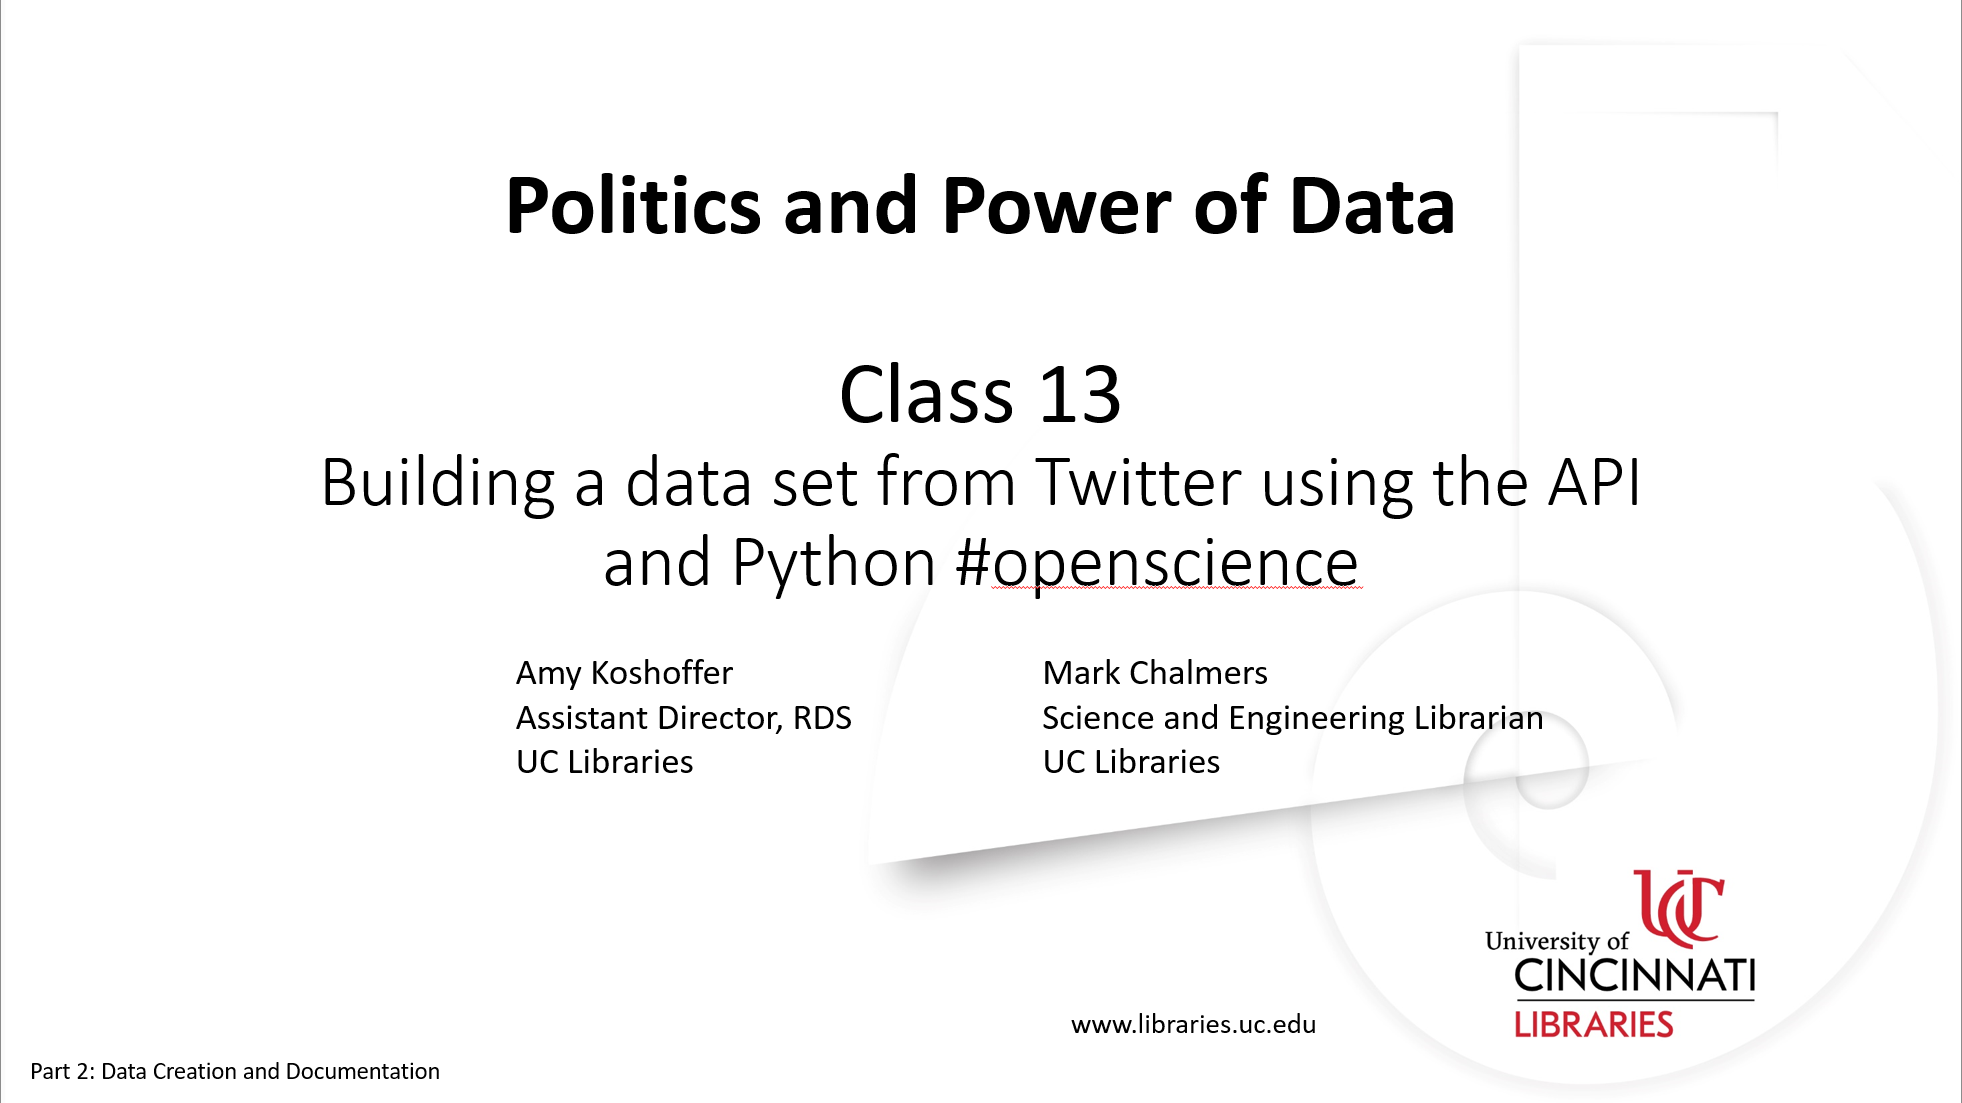

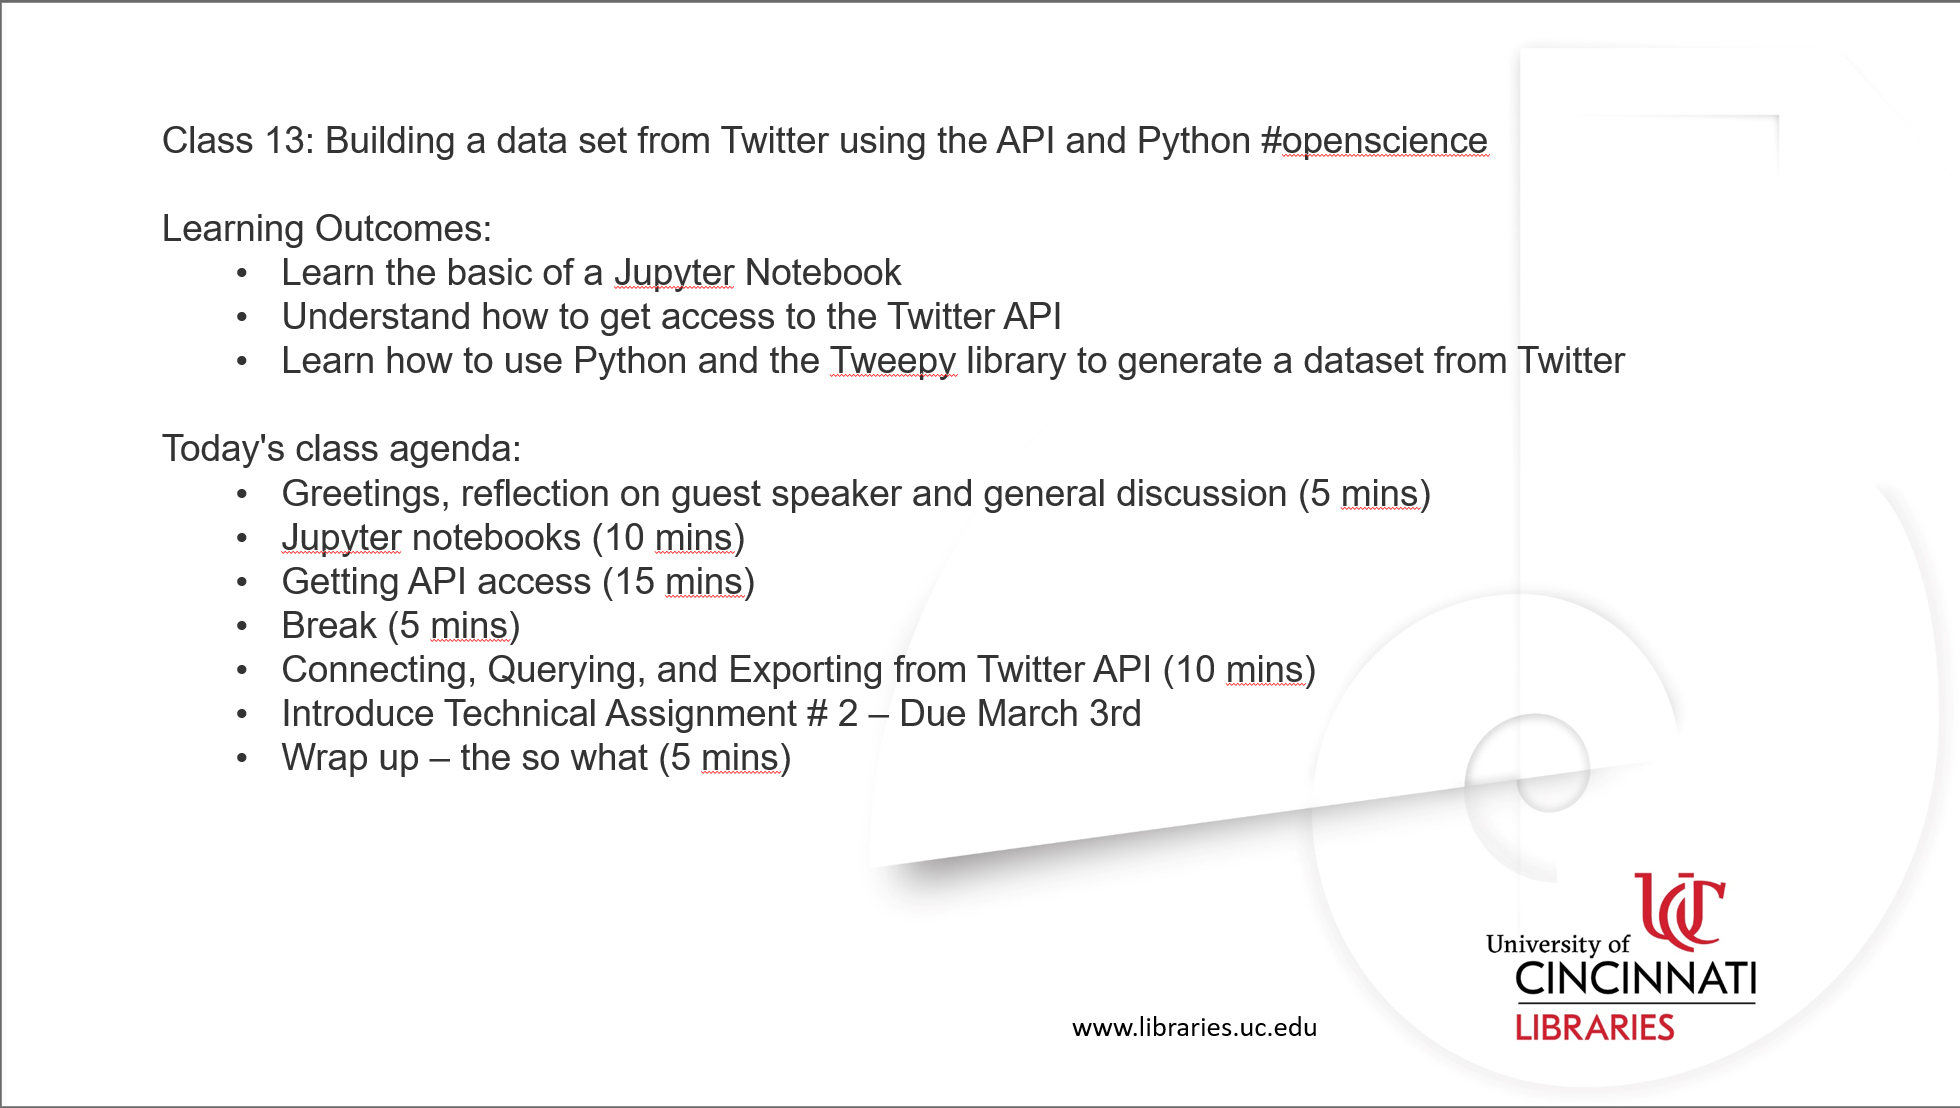

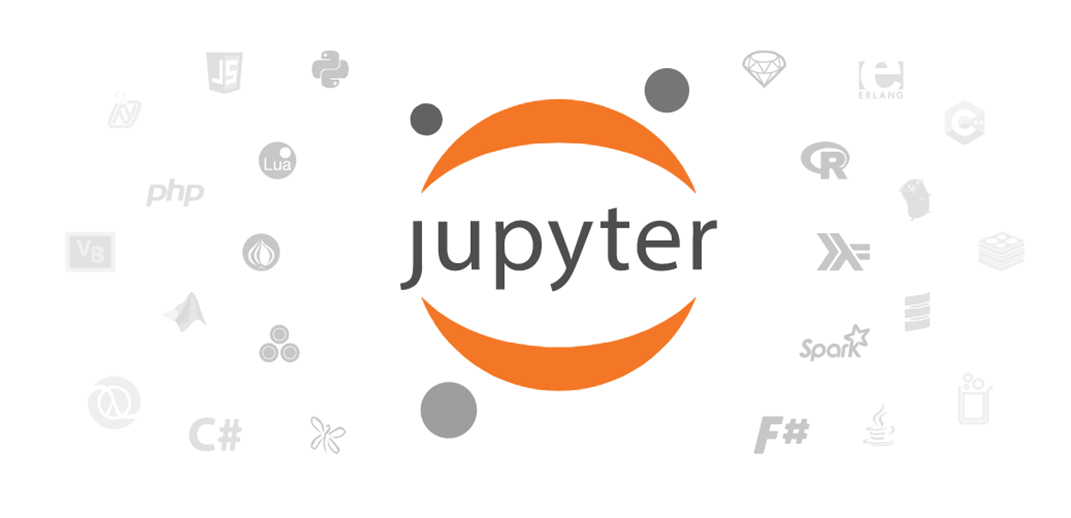

# Jupyter Notebooks are a product of Project Jupyter 
Project Jupyter is:

- ## A Collection of Standards

    - Open Standards for Interactive Computing
    
    - Standard Kernals for Julia, Python, & R 
    

- ## A Set of Software Tools

    - Jupyter Notebook
    
    - Other include JupyterLab & Viola 
    

- ## A Community

    - Jupytercon
    
    - https://jupyter.org/community 
    

Learn more at https://jupyter.org/ 


# But What is a Jupyter Notebook?

- A Jupyter notebook is a web-based document that supports mixing executable code, equations, visualizations, and narrative text.


- Jupyter notebooks allow the user to bring together data, code, and prose, to tell an interactive, computational story. 


- The notebook has two main components – the kernel and the dashboard. 

    - The dashboard is the interface and the kernel is the program that runs and inspects the code. Kernels can be on the local machine or elsewhere.
    
- Our Python guide has instructions for downloading in installing Python and Jupyter Notebooks - https://guides.libraries.uc.edu/python 

# Getting Access to the Twitter API

Anyone can get access to the Twitter API, but they need to follow some steps

- ## Create a Twitter Account

    - In order to access the API, you need to use a Twitter account. This does not need to be your personal twitter account. 
    
    

- ## Sign up for a Developer Account

    - Basic developer account gives access to the "Essential" level of the API
    
    - https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api 
    

- ## Create a Project & App

    - This gives you your API Key and Secret
    
    
## If you want access to higher tiers of the API, you have to fill out an additional application.

- See details of each tier here https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api 

# Getting Started Using the API

First, we will load in our python packages tweepy and pandas. tweepy is a wrapper for connecting and pulling from the Twitter API and pandas is a package for working with data. You can read the documentation for tweepy and pandas here https://docs.tweepy.org/en/stable/ & https://pandas.pydata.org/ 

In [1]:
import tweepy as tw 
import pandas as pd

First I am storing my API key and Secret as variables for me to use to connect to the API to get data. When I created this workbook, I had the keys loaded in. I have deleted the values here because they are not to be shared widely, as anyone who finds this could use my keys. 

In [2]:
#Store the keys here in variables
my_api_key = ''
my_api_secret = ''

Next, we are setting up the authentication and api call into variables. This is what makes Tweepy very easy to use. Recall the jupyter notebook that Bill shared with us where he explored Kroger data. These Tweepy functions greatly simplify the process of connecting to the API with Python. 

In [3]:
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)
search_query = "#openscience -filter:retweets"

Lets first grab 1 test tweet to explore the data model. 

https://docs.tweepy.org/en/stable/api.html#tweepy.API.search_tweets 

In [4]:
test_tweet = api.search_tweets(search_query, result_type = "recent", count = 1)

In [5]:
test_tweet

[Status(_api=<tweepy.api.API object at 0x00000223D1605900>, _json={'created_at': 'Mon Feb 21 18:11:38 +0000 2022', 'id': 1495823543409467399, 'id_str': '1495823543409467399', 'text': 'As I keep #LongCovid patients in my thoughts and prayers,\n   I think - and ask you to think too -\nof "Long-Sepsis"… https://t.co/XVDPuwGLj6', 'truncated': True, 'entities': {'hashtags': [{'text': 'LongCovid', 'indices': [10, 20]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/XVDPuwGLj6', 'expanded_url': 'https://twitter.com/i/web/status/1495823543409467399', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 79975924, 'id_str': '79975924',

The api.search_tweets() function can only get 100 tweets. To get more, we need to use the Tweepy Cursor object. https://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html - We will need to move the tweets into a list from the Cursor object to work with them. 

In [6]:
tweets=tw.Cursor(api.search_tweets,search_query,tweet_mode="extended", 
                 result_type = "recent").items(1000)

In [7]:
openscience_tweets=[]
for tweet in tweets:
   openscience_tweets.append(tweet)

In [8]:
openscience_tweets[600]

Status(_api=<tweepy.api.API object at 0x00000223D1605900>, _json={'created_at': 'Thu Feb 17 10:55:00 +0000 2022', 'id': 1494264108555853825, 'id_str': '1494264108555853825', 'full_text': 'Tomorrow, I will talk about my #openscience journey &amp; leading a replications &amp; extension project with the Hong Kong mass replication team.\n\nTime: Feb 18 2022 4pm HK time; 9am CET \nPlace: Zoom\nhttps://t.co/tAOsrChx8E (psyc)', 'truncated': False, 'display_text_range': [0, 230], 'entities': {'hashtags': [{'text': 'openscience', 'indices': [31, 43]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tAOsrChx8E', 'expanded_url': 'https://hku.zoom.us/j/3951550048?pwd=SncvL3RYakEycUtpL29vdDJEdlEwdz09', 'display_url': 'hku.zoom.us/j/3951550048?p…', 'indices': [200, 223]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str'

In [9]:
openscience_tweets[600]._json

{'created_at': 'Thu Feb 17 10:55:00 +0000 2022',
 'id': 1494264108555853825,
 'id_str': '1494264108555853825',
 'full_text': 'Tomorrow, I will talk about my #openscience journey &amp; leading a replications &amp; extension project with the Hong Kong mass replication team.\n\nTime: Feb 18 2022 4pm HK time; 9am CET \nPlace: Zoom\nhttps://t.co/tAOsrChx8E (psyc)',
 'truncated': False,
 'display_text_range': [0, 230],
 'entities': {'hashtags': [{'text': 'openscience', 'indices': [31, 43]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/tAOsrChx8E',
    'expanded_url': 'https://hku.zoom.us/j/3951550048?pwd=SncvL3RYakEycUtpL29vdDJEdlEwdz09',
    'display_url': 'hku.zoom.us/j/3951550048?p…',
    'indices': [200, 223]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,

the entities block is an interesting nested object that comes from the API which contains information about *hashtags, symbols, user_mentions, and URLS*. **These are often objects of interest in twitter research**, so lets take some time to extract some of that information from the entities. Lets capture the hashtags, mentions, and URLS that are shared. 

First, look at the entities nest for the first tweet. I show two ways to explore this below. First, by calling the entities from the first tweet in our openscience_tweets object, and second, by starting the loop and breaking it after the first call. This loop will be expanded below. 

In [10]:
openscience_tweets[0].entities

{'hashtags': [{'text': 'LongCovid', 'indices': [10, 20]},
  {'text': 'openscience', 'indices': [223, 235]},
  {'text': 'sepsis', 'indices': [236, 243]},
  {'text': 'scicomm', 'indices': [244, 252]},
  {'text': 'snrtg', 'indices': [253, 259]},
  {'text': 'COVID19', 'indices': [260, 268]}],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/2Oxn2egWly',
   'expanded_url': 'https://www.frontiersin.org/articles/10.3389/fimmu.2020.605666/full',
   'display_url': 'frontiersin.org/articles/10.33…',
   'indices': [199, 222]}],
 'media': [{'id': 1495822867866558466,
   'id_str': '1495822867866558466',
   'indices': [269, 292],
   'media_url': 'http://pbs.twimg.com/media/FMI6-R4XoAI1jf_.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/FMI6-R4XoAI1jf_.jpg',
   'url': 'https://t.co/erTTT1TeJ7',
   'display_url': 'pic.twitter.com/erTTT1TeJ7',
   'expanded_url': 'https://twitter.com/Primary_Immune/status/1495823543409467399/photo/1',
   'type': 'photo',
   'sizes': {'thumb

In [11]:
for i in openscience_tweets:
    print(i.entities)
    break

{'hashtags': [{'text': 'LongCovid', 'indices': [10, 20]}, {'text': 'openscience', 'indices': [223, 235]}, {'text': 'sepsis', 'indices': [236, 243]}, {'text': 'scicomm', 'indices': [244, 252]}, {'text': 'snrtg', 'indices': [253, 259]}, {'text': 'COVID19', 'indices': [260, 268]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/2Oxn2egWly', 'expanded_url': 'https://www.frontiersin.org/articles/10.3389/fimmu.2020.605666/full', 'display_url': 'frontiersin.org/articles/10.33…', 'indices': [199, 222]}], 'media': [{'id': 1495822867866558466, 'id_str': '1495822867866558466', 'indices': [269, 292], 'media_url': 'http://pbs.twimg.com/media/FMI6-R4XoAI1jf_.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FMI6-R4XoAI1jf_.jpg', 'url': 'https://t.co/erTTT1TeJ7', 'display_url': 'pic.twitter.com/erTTT1TeJ7', 'expanded_url': 'https://twitter.com/Primary_Immune/status/1495823543409467399/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium

Lets explore the just the hashtags list for each of the tweets in our dataset

In [12]:
for i in openscience_tweets:
    print(i.entities['hashtags'])

[{'text': 'LongCovid', 'indices': [10, 20]}, {'text': 'openscience', 'indices': [223, 235]}, {'text': 'sepsis', 'indices': [236, 243]}, {'text': 'scicomm', 'indices': [244, 252]}, {'text': 'snrtg', 'indices': [253, 259]}, {'text': 'COVID19', 'indices': [260, 268]}]
[{'text': 'openscience', 'indices': [217, 229]}, {'text': 'kinesiology', 'indices': [230, 242]}]
[{'text': 'OpenScholarship', 'indices': [129, 145]}, {'text': 'OpenScience', 'indices': [152, 164]}]
[{'text': 'OpenResearch', 'indices': [206, 219]}, {'text': 'OpenScience', 'indices': [222, 234]}]
[{'text': 'OpenResearch', 'indices': [20, 33]}, {'text': 'OpenScience', 'indices': [80, 92]}]
[{'text': 'openscience', 'indices': [35, 47]}]
[{'text': 'OpenScience', 'indices': [75, 87]}, {'text': 'OpenAccess', 'indices': [88, 99]}]
[{'text': 'OpenScience', 'indices': [46, 58]}]
[{'text': 'mycetoma', 'indices': [23, 32]}, {'text': 'openscience', 'indices': [115, 127]}, {'text': 'NTDs', 'indices': [128, 133]}]
[{'text': 'webinaire', 'i

I created the loop below to extract just the clean hashtag data for each tweet from the entities information. Compare the outbelow to the output above

In [13]:
for tweet in openscience_tweets:
    array_length = len(tweet.entities['hashtags'])
    hashtags = []
    if array_length > 0:
        for i in range(array_length):
            hashtags.append(tweet.entities['hashtags'][i]['text'])
    else:
        hashtags.append('NA')

    print(hashtags)

['LongCovid', 'openscience', 'sepsis', 'scicomm', 'snrtg', 'COVID19']
['openscience', 'kinesiology']
['OpenScholarship', 'OpenScience']
['OpenResearch', 'OpenScience']
['OpenResearch', 'OpenScience']
['openscience']
['OpenScience', 'OpenAccess']
['OpenScience']
['mycetoma', 'openscience', 'NTDs']
['webinaire', 'intégritéScientifique', 'openscience', 'researcdata']
['Openscience', 'multiculturalism']
['OpenScience', 'multiculturalism']
['OpenScience', 'multicultural', 'diversity']
['MinorityTax', 'OpenScience']
['OpenScience', 'inequity']
['reproducibility', 'replication', 'OpenScience', 'accessibility', 'justice']
['MixedMethods', 'OpenScience']
['OpenScience', 'impact']
['OpenScience']
['OpenScience', 'multicultural', 'psychology', 'EthnicMinority', 'research']
['multicultural', 'OpenScience']
['OpenScience']
['diversity', 'OpenScience']
['openscience']
['OpenScience', 'eval']
['ScienceOuverte', 'OpenScience']
['openscience']
['TeamScience', 'OpenScience', 'OpenScholarship', 'OpenRese

In [14]:
for i in openscience_tweets:
    print(i.entities['urls'])

[{'url': 'https://t.co/2Oxn2egWly', 'expanded_url': 'https://www.frontiersin.org/articles/10.3389/fimmu.2020.605666/full', 'display_url': 'frontiersin.org/articles/10.33…', 'indices': [199, 222]}]
[{'url': 'https://t.co/fuktHTSbck', 'expanded_url': 'https://sites.google.com/storkinesiology.org/stork-summit-2022/home', 'display_url': 'sites.google.com/storkinesiolog…', 'indices': [177, 200]}, {'url': 'https://t.co/pScEx4Q3to', 'expanded_url': 'https://twitter.com/STORKinesiology/status/1492203505620246528', 'display_url': 'twitter.com/STORKinesiolog…', 'indices': [243, 266]}]
[{'url': 'https://t.co/eWyEkHvAZ3', 'expanded_url': 'https://forrt.org/glossary/', 'display_url': 'forrt.org/glossary/', 'indices': [195, 218]}, {'url': 'https://t.co/jqAly8zsT2', 'expanded_url': 'https://twitter.com/FORRTproject/status/1495801187081371653', 'display_url': 'twitter.com/FORRTproject/s…', 'indices': [275, 298]}]
[{'url': 'https://t.co/j06zlaWHFb', 'expanded_url': 'https://forrt.org/glossary/', 'displ

In [15]:
for i in openscience_tweets:
    print(i.entities['user_mentions'])

[]
[]
[{'screen_name': 'NatureHumBehav', 'name': 'NatureHumanBehaviour', 'id': 706800925394997249, 'id_str': '706800925394997249', 'indices': [8, 23]}, {'screen_name': 'FORRTproject', 'name': 'FORRT', 'id': 1026044877430292480, 'id_str': '1026044877430292480', 'indices': [68, 81]}]
[{'screen_name': 'FORRTproject', 'name': 'FORRT', 'id': 1026044877430292480, 'id_str': '1026044877430292480', 'indices': [85, 98]}]
[{'screen_name': 'NatureHumBehav', 'name': 'NatureHumanBehaviour', 'id': 706800925394997249, 'id_str': '706800925394997249', 'indices': [50, 65]}, {'screen_name': 'FORRTproject', 'name': 'FORRT', 'id': 1026044877430292480, 'id_str': '1026044877430292480', 'indices': [270, 283]}]
[{'screen_name': 'FORRTproject', 'name': 'FORRT', 'id': 1026044877430292480, 'id_str': '1026044877430292480', 'indices': [91, 104]}, {'screen_name': 'NatureHumBehav', 'name': 'NatureHumanBehaviour', 'id': 706800925394997249, 'id_str': '706800925394997249', 'indices': [162, 177]}]
[]
[]
[{'screen_name': '

In [142]:
for tweet in openscience_tweets:
    array_length_mentions = len(tweet.entities['user_mentions'])
    mentions = []
    if array_length_mentions > 0:
        for i in range(array_length_mentions):
            mentions.append(tweet.entities['user_mentions'][i]['screen_name'])
    else:
        mentions.append('NA')

    print(mentions)

['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['SPARC_EU', 'EbbaOssian']
['PLOSONE']
['NA']
['SciPolJournal']
['NA']
['NatureHumBehav']
['NA']
['NA']
['NA']
['GaboReyes84', 'JeromeSackur']
['AcademicEEG']
['NA']
['NA']
['ShaniEvenstein']
['NA']
['EJ_Norris']
['NA']
['NA']
['NA']
['BayerPharma']
['NA']
['NA']
['NA']
['AliceCHughes']
['NA']
['NA']
['NA']
['TheVarsity', 'UofT']
['nwb2022']
['NA']
['EHU_FOE']
['NA']
['NA']
['NA']
['NA']
['NA']
['ZonaPellucida_']
['NA']
['HelenBWoods', 'StephenPinfield']
['NA']
['NA']
['NA']
['PLOSONE']
['NA']
['tomhostler']
['ElenLeFoll']
['NA']
['LIBSENSE']
['NA']
['NA']
['AcademicTox', 'AcesSthlmUni']
['a_charidimou']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['github', 'Netlify']
['NatureComms', 'GuiomarPedro']
['github', 'Netlify']
['NA']
['NA']
['NA']
['NA']
['AnaFilipaMota6', 'dfarmausc']
['NA']
['FAIR_Points', 'ResearchEquals']
['UnivRennes_2', 'BURennes2']
['FR_Conversation']
['MSHE_Ledoux', 'pufc

In [16]:
for tweet in openscience_tweets:
    array_length_urls = len(tweet.entities['urls'])
    urls = []
    if array_length_urls > 0:
        for i in range(array_length_urls):
            urls.append(tweet.entities['urls'][i]['expanded_url'])
    else:
        urls.append('NA')

    print(urls)

['https://www.frontiersin.org/articles/10.3389/fimmu.2020.605666/full']
['https://sites.google.com/storkinesiology.org/stork-summit-2022/home', 'https://twitter.com/STORKinesiology/status/1492203505620246528']
['https://forrt.org/glossary/', 'https://twitter.com/FORRTproject/status/1495801187081371653']
['https://forrt.org/glossary/']
['https://twitter.com/FORRTproject/status/1495801187081371653']
['https://twitter.com/FORRTproject/status/1495801187081371653']
['https://www.nature.com/articles/d41586-022-00402-1']
['https://twitter.com/scipoljournal/status/1495732898980315141']
['https://github.com/OpenSourceMycetoma/Series-1-Fenarimols/issues/70']
['https://twitter.com/Enroweb/status/1495754574828867591']
['NA']
['https://bit.ly/3vaeFPk']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['NA']
['https://twitter.com/PsyArXivBot/status/1495569018190712834']
['https://twitter.com/FORRTproject/status/1495801187081371653']
['NA']
['https://twitter.com/ouvrirlascience/status/1

In [17]:
df = pd.DataFrame()

for tweet in openscience_tweets:
    
    array_length_hashtags = len(tweet.entities['hashtags'])
    hashtags = []
    
    array_length_mentions = len(tweet.entities['user_mentions'])
    mentions = []
    
    array_length_urls = len(tweet.entities['urls'])
    urls = []
    
    if array_length_hashtags > 0:
        for i in range(array_length_hashtags):
            hashtags.append(tweet.entities['hashtags'][i]['text'])
    else:
        hashtags.append('NA')
    
    if array_length_mentions > 0:
        for i in range(array_length_mentions):
            mentions.append(tweet.entities['user_mentions'][i]['screen_name'])
    else:
        mentions.append('NA')
    
    if array_length_urls > 0:
        for i in range(array_length_urls):
            urls.append(tweet.entities['urls'][i]['expanded_url'])
    else:
        urls.append('NA')
        
    df = df.append({'tweet_text': tweet.full_text,
                    'language': tweet.lang,
                    'hashtags': hashtags,
                    'mentions': mentions,
                    'URL': urls,
                    'date': tweet.created_at,
                    'user_name': tweet.user.name,
                    'user_location': tweet.user.location,
                    'user_description': tweet.user.description,
                    'user_verified': tweet.user.verified,
                    'user_followers_count': tweet.user.followers_count, 
                    'user_account_age': tweet.user.created_at, 
                    'user_verified': tweet.user.verified,
                    'source': tweet.source,
                    'user_favourites_count': tweet.user.favourites_count,
                    'user_tweets': tweet.user.statuses_count,
                    'tweet_retweet_count': tweet.retweet_count,
                    'tweet_favorite_count': tweet.favorite_count},
                    
                   ignore_index=True)

df.head()

,tweet_text,language,hashtags,mentions,URL,date,user_name,user_location,user_description,user_verified,user_followers_count,user_account_age,source,user_favourites_count,user_tweets,tweet_retweet_count,tweet_favorite_count
0,As I keep #LongCovid patients in my thoughts a...,en,"[LongCovid, openscience, sepsis, scicomm, snrt...",[NA],[https://www.frontiersin.org/articles/10.3389/...,2022-02-21 18:11:38+00:00,Yoni Maisel,Haifa,Dad. Immunodeficient. Has 2 rare diseases: CVI...,0.0,29554.0,2009-10-05 09:23:34+00:00,Twitter Web App,44583.0,51664.0,2.0,1.0
1,Just one week left to submit your session prop...,en,"[openscience, kinesiology]",[NA],[https://sites.google.com/storkinesiology.org/...,2022-02-21 18:09:42+00:00,Improving Kinesiology,International,"Society for Transparency, Openness, and Replic...",0.0,1958.0,2018-11-15 14:29:41+00:00,Twitter Web App,600.0,905.0,1.0,0.0
2,The new @NatureHumBehav comment describes the ...,en,"[OpenScholarship, OpenScience]","[NatureHumBehav, FORRTproject]","[https://forrt.org/glossary/, https://twitter....",2022-02-21 17:55:56+00:00,Aleksandra Lazić,"Belgrade, Serbia",Social Psychology PhD Candidate & Research Ass...,0.0,811.0,2019-01-23 15:31:47+00:00,Twitter Web App,16029.0,4764.0,2.0,2.0
3,"As an ecologist, it has been a great (and eye-...",en,"[OpenResearch, OpenScience]",[FORRTproject],[https://forrt.org/glossary/],2022-02-21 17:53:25+00:00,Sara Lil Middleton,Looking for plants in a field,Plant functional ecology PhD @UniofOxford 🌱| F...,0.0,3671.0,2009-03-01 12:03:49+00:00,Twitter Web App,10720.0,1489.0,1.0,0.0
4,Our new glossary of #OpenResearch terms is out...,en,"[OpenResearch, OpenScience]","[NatureHumBehav, FORRTproject]",[https://twitter.com/FORRTproject/status/14958...,2022-02-21 17:53:24+00:00,Sara Lil Middleton,Looking for plants in a field,Plant functional ecology PhD @UniofOxford 🌱| F...,0.0,3671.0,2009-03-01 12:03:49+00:00,Twitter Web App,10720.0,1489.0,1.0,0.0


Excel will not accept the default date format for export, so we need to localize the date.

In [18]:
df['date'] = df['date'].dt.tz_localize(None)
df['user_account_age'] = df['user_account_age'].dt.tz_localize(None)

Now we have a dataset in a tidy format for export to excel

In [19]:
# create excel writer object
writer = pd.ExcelWriter('openscience_tweets_20220221.xlsx')
# write dataframe to excel
df.to_excel(writer)
# save the excel
writer.save()

# Introducing Technical Assignment #2

We have now created a dataset of tweets using the hashtag #openscience. For this assignment, you will practice data documentation by creating a readme file and a data dictionary for this Twitter dataset. These documents will explain how the data was created, what the context is, the structure of the data and any manipulations done to the data. tweets_openscience_20220215.xlsx 


(25 pts) Readme File
Follow the provided readme example file and template to produce your own readme file for the #openscience dataset - README_template.txt , README_example.txt 
Ensure your readme file has all components including the title of the dataset, preferred citation, author information, a summary, a description of files and folders, information on materials and methods, contributors and roles, and any additional notes. Note: for for license, you should can put "Creative Commons Attribution-NonCommercial" or CC NC , as we agreed that the data collected could not be used for commercial purposed when signing up for the Twitter API. 


(25 pts) Data Dictionary
Use the provided template to create a data dictionary for the #openscience dataset. - Data Dictionary Blank Template.xlsx 
Ensure you fill out the data dictionary template for each field in the Twitter dataset. For each field, you must provide the spreadsheet tab, the element or value display name, a description of the field, the data type, a max character length, the acceptable values, if it is required, and if accepts null values. Add rows and columns as necessary, and enter N/A if something doesn’t applies.